<a href="https://colab.research.google.com/github/madhura1602/example_repo/blob/master/WHOQOL_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/WHOQOL_D1_D2_D3_D4_data.xlsx',skiprows=3,header=None,sheet_name="D1")
df2 = pd.read_excel('/content/drive/MyDrive/WHOQOL_D1_D2_D3_D4_data.xlsx',skiprows=3,header=None,sheet_name="D2")
df3 = pd.read_excel('/content/drive/MyDrive/WHOQOL_D1_D2_D3_D4_data.xlsx',skiprows=3,header=None,sheet_name="D3")
df4 = pd.read_excel('/content/drive/MyDrive/WHOQOL_D1_D2_D3_D4_data.xlsx',skiprows=3,header=None,sheet_name="D4")

In [ ]:
print("Df1 \n",df1.head())
print("Df2 \n",df2.head())
print("Df3 \n",df3.head())
print("Df4 \n",df4.head())

Df1 
      0    1    2    3    4    5    6    7
0  PID   Q3   Q4  Q10  Q15  Q16  Q17  Q18
1  1.0  1.0  1.0  4.0  5.0  4.0  3.0  8.0
2  2.0  2.0  2.0  2.0  4.0  4.0  4.0  4.0
3  3.0  3.0  3.0  2.0  2.0  1.0  2.0  2.0
4  4.0  4.0  3.0  3.0  1.0  1.0  3.0  2.0
Df2 
      0    1    2    3    4    5    6
0  PID   Q5   Q6   Q7  Q11  Q19  Q26
1  1.0  4.0  4.0  4.0  4.0  5.0  2.0
2  2.0  4.0  2.0  4.0  3.0  4.0  2.0
3  3.0  2.0  2.0  1.0  2.0  2.0  5.0
4  4.0  1.0  2.0  4.0  1.0  2.0  4.0
Df3 
      0    1    2    3
0  PID  Q20  Q21  Q22
1  1.0  5.0  NaN  1.0
2  2.0  4.0  NaN  2.0
3  3.0  1.0  1.0  1.0
4  4.0  4.0  4.0  1.0
Df4 
      0    1    2    3    4    5    6    7    8
0  PID   Q8   Q9  Q12  Q13  Q14  Q23  Q24  Q25
1  1.0  4.0  5.0  3.0  4.0  4.0  5.0  5.0  5.0
2  2.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  5.0
3  3.0  2.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0
4  4.0  3.0  4.0  3.0  4.0  4.0  4.0  5.0  5.0


In [ ]:
new_header = df1.iloc[0]
df1 = df1[1:]
df1.columns = new_header

new_header = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header

new_header = df3.iloc[0]
df3 = df3[1:]
df3.columns = new_header

new_header = df4.iloc[0]
df4 = df4[1:]
df4.columns = new_header

In [ ]:
print("Df1 =",df1.shape)
print("Df2 =",df2.shape)
print("Df3 =",df3.shape)
print("Df4 =",df4.shape)

Df1 = (86, 8)
Df2 = (86, 7)
Df3 = (86, 4)
Df4 = (86, 9)


In [ ]:
df3['Q21'] = df3['Q21'].fillna(0)
# df1['Q17'] = df1['Q17'].fillna(0)

# df3['Q21'] = df3['Q21'].fillna(df3['Q21'].mean())
# df1['Q17'] = df1['Q17'].fillna(df1['Q17'].mean())
# df2['Q26'] = df2['Q26'].fillna(df2['Q26'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print("Df1 \n",df1.head())
print("Df2 \n",df2.head())
print("Df3 \n",df3.head())
print("Df4 \n",df4.head())

Df1 
 0  PID   Q3   Q4  Q10  Q15  Q16  Q17  Q18
1  1.0  1.0  1.0  4.0  5.0  4.0  3.0  8.0
2  2.0  2.0  2.0  2.0  4.0  4.0  4.0  4.0
3  3.0  3.0  3.0  2.0  2.0  1.0  2.0  2.0
4  4.0  4.0  3.0  3.0  1.0  1.0  3.0  2.0
5  5.0  3.0  3.0  2.0  4.0  2.0  4.0  3.0
Df2 
 0  PID   Q5   Q6   Q7  Q11  Q19  Q26
1  1.0  4.0  4.0  4.0  4.0  5.0  2.0
2  2.0  4.0  2.0  4.0  3.0  4.0  2.0
3  3.0  2.0  2.0  1.0  2.0  2.0  5.0
4  4.0  1.0  2.0  4.0  1.0  2.0  4.0
5  5.0  2.0  1.0  3.0  2.0  3.0  2.0
Df3 
 0  PID  Q20  Q21  Q22
1  1.0  5.0  0.0  1.0
2  2.0  4.0  0.0  2.0
3  3.0  1.0  1.0  1.0
4  4.0  4.0  4.0  1.0
5  5.0  4.0  0.0  2.0
Df4 
 0  PID   Q8   Q9  Q12  Q13  Q14  Q23  Q24  Q25
1  1.0  4.0  5.0  3.0  4.0  4.0  5.0  5.0  5.0
2  2.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  5.0
3  3.0  2.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0
4  4.0  3.0  4.0  3.0  4.0  4.0  4.0  5.0  5.0
5  5.0  3.0  4.0  1.0  4.0  2.0  4.0  4.0  4.0


In [ ]:
df_merge=pd.merge(df1,df2,on='PID',how='inner')
df_merge=pd.merge(df_merge,df3,on='PID',how='inner')
df_merge=pd.merge(df_merge,df4,on='PID',how='inner')
df_merge=df_merge.drop('PID',axis=1)
print(df_merge)

0    Q3   Q4  Q10  Q15  Q16  Q17  Q18   Q5   Q6   Q7  ...  Q21  Q22   Q8   Q9  \
0   1.0  1.0  4.0  5.0  4.0  3.0  8.0  4.0  4.0  4.0  ...  0.0  1.0  4.0  5.0   
1   2.0  2.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  4.0  ...  0.0  2.0  4.0  4.0   
2   3.0  3.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  1.0  ...  1.0  1.0  2.0  4.0   
3   4.0  3.0  3.0  1.0  1.0  3.0  2.0  1.0  2.0  4.0  ...  4.0  1.0  3.0  4.0   
4   3.0  3.0  2.0  4.0  2.0  4.0  3.0  2.0  1.0  3.0  ...  0.0  2.0  3.0  4.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
81  2.0  2.0  4.0  5.0  1.0  4.0  4.0  2.0  4.0  4.0  ...  4.0  3.0  3.0  4.0   
82  1.0  1.0  3.0  5.0  4.0  4.0  3.0  4.0  3.0  4.0  ...  4.0  1.0  3.0  4.0   
83  2.0  2.0  2.0  4.0  2.0  4.0  3.0  2.0  2.0  3.0  ...  0.0  4.0  4.0  4.0   
84  2.0  2.0  4.0  2.0  1.0  4.0  4.0  2.0  2.0  4.0  ...  2.0  3.0  2.0  4.0   
85  2.0  2.0  3.0  4.0  2.0  4.0  3.0  4.0  4.0  4.0  ...  4.0  3.0  4.0  4.0   

0   Q12  Q13  Q14  Q23  Q24

In [ ]:
mean=df_merge.mean(axis=0)
print("Mean\n",mean)
print("Maximum mean",max(mean))
print("Minimum mean",min(mean))

sum = df_merge.sum(axis=0)
print("\nSum\n",sum)
print("Maximum sum",max(sum))
print("Minimum sum",min(sum))

Mean
 0
Q3     2.151163
Q4     2.127907
Q10    3.139535
Q15    4.209302
Q16    2.441860
Q17    3.383721
Q18    3.290698
Q5     2.639535
Q6     2.720930
Q7     3.383721
Q11    2.104651
Q19    2.906977
Q26    3.116279
Q20    3.511628
Q21    2.372093
Q22    2.197674
Q8     3.209302
Q9     4.011628
Q12    2.709302
Q13    4.162791
Q14    3.872093
Q23    4.011628
Q24    4.139535
Q25    4.465116
dtype: float64
Maximum mean 4.465116279069767
Minimum mean 2.104651162790698

Sum
 0
Q3     185.0
Q4     183.0
Q10    270.0
Q15    362.0
Q16    210.0
Q17    291.0
Q18    283.0
Q5     227.0
Q6     234.0
Q7     291.0
Q11    181.0
Q19    250.0
Q26    268.0
Q20    302.0
Q21    204.0
Q22    189.0
Q8     276.0
Q9     345.0
Q12    233.0
Q13    358.0
Q14    333.0
Q23    345.0
Q24    356.0
Q25    384.0
dtype: object
Maximum sum 384.0
Minimum sum 181.0


In [ ]:
### Domain 1 ###
# print("Domain 1")
# print('Q3 =',df1["Q3"].sum())
# print('Q4 =',df1["Q4"].sum())
# print('Q10 =',df1["Q10"].sum())
# print('Q15 =',df1["Q15"].sum())
# print('Q16 =',df1["Q16"].sum())
# print('Q17 =',df1["Q17"].sum())
# print('Q18 =',df1["Q18"].sum())

print("\nMean\n")
print('Q3 =',df1["Q3"].mean())
print('Q4 =',df1["Q4"].mean())
print('Q10 =',df1["Q10"].mean())
print('Q15 =',df1["Q15"].mean())
print('Q16 =',df1["Q16"].mean())
print('Q17 =',df1["Q17"].mean())
print('Q18 =',df1["Q18"].mean())


Mean

Q3 = 2.1511627906976742
Q4 = 2.127906976744186
Q10 = 3.13953488372093
Q15 = 4.209302325581396
Q16 = 2.441860465116279
Q17 = 3.383720930232558
Q18 = 3.2906976744186047


In domain 1 (Physical) Question 4 that is How much do you need any medical treatment to function in your daily life? has got lowest score. This shows that alcohol affects the health. Question 15 that is How well are you able to get around? has got higest score.

In [ ]:
### Domain 2 ###
# print("Domain 2")
# print('Q5 =',df2["Q5"].sum())
# print('Q6 =',df2["Q6"].sum())
# print('Q7 =',df2["Q7"].sum())
# print('Q11 =',df2["Q11"].sum())
# print('Q19 =',df2["Q19"].sum())
# print('Q26 =',df2["Q26"].sum())

print("\nMean\n")
print('Q5 =',df2["Q5"].mean())
print('Q6 =',df2["Q6"].mean())
print('Q7 =',df2["Q7"].mean())
print('Q11 =',df2["Q11"].mean())
print('Q19 =',df2["Q19"].mean())
print('Q26 =',df2["Q26"].mean())


Mean

Q5 = 2.63953488372093
Q6 = 2.7209302325581395
Q7 = 3.383720930232558
Q11 = 2.104651162790698
Q19 = 2.9069767441860463
Q26 = 3.116279069767442


In domain 2 (Psychological) Question 11 that is Are you able to accept your bodily appearance? has got lowest score. This shows that most of them alcoholoism reduced the cofidenece among people and Question 7 that is How well are you able to concentrate? has got highest score.

In [ ]:
### Domain 3 ###
# print("Domain 3")
# print('Q20 =',df3["Q20"].sum())
# print('Q21 =',df3["Q21"].sum())
# print('Q22 =',df3["Q22"].sum())

print("\nMean\n")
print('Q20 =',df3["Q20"].mean())
print('Q21 =',df3["Q21"].mean())
print('Q22 =',df3["Q22"].mean())


Mean

Q20 = 3.511627906976744
Q21 = 2.372093023255814
Q22 = 2.197674418604651


In domain 3 (Social Factor) Question 22 that is How satisfied are you with the support you get from your friends? has got lowest score. This shows that alcoholism created a drift among people and alcoholics are not accepeted by their friends. Question 20 that is How satisfied are you with your personal relationships? has got highest score ths shows that alcoholics getting their family support in their life.

In [ ]:
### Domain 4 ###
# print("Domain 4")
# print('Q8 =',df4["Q8"].sum())
# print('Q9 =',df4["Q9"].sum())
# print('Q12 =',df4["Q12"].sum())
# print('Q13 =',df4["Q13"].sum())
# print('Q14 =',df4["Q14"].sum())
# print('Q23 =',df4["Q23"].sum())
# print('Q24 =',df4["Q24"].sum())
# print('Q25 =',df4["Q25"].sum())
print("\nMean\n")
print('Q8 =',df4["Q8"].mean())
print('Q9 =',df4["Q9"].mean())
print('Q12 =',df4["Q12"].mean())
print('Q13 =',df4["Q13"].mean())
print('Q14 =',df4["Q14"].mean())
print('Q23 =',df4["Q23"].mean())
print('Q24 =',df4["Q24"].mean())
print('Q25 =',df4["Q25"].mean())


Mean

Q8 = 3.2093023255813953
Q9 = 4.011627906976744
Q12 = 2.7093023255813953
Q13 = 4.162790697674419
Q14 = 3.872093023255814
Q23 = 4.011627906976744
Q24 = 4.1395348837209305
Q25 = 4.465116279069767


In domain 4 (Environment) Question 12 that is Have you enough money to meet your needs? has got lowest score. This shows that alcoholism worsten their economic condition even they not able to meet their needs.and Question 25 that is How satisfied are 
you with your mode of transportation? has got highest score this shows that there is no problem with their mode of transportation.

In [ ]:
for ind,row in df1.iterrows():
    df1.loc[ind,"D1_Sum"] = row["Q3"]+row["Q4"]+row["Q10"]+row["Q15"]+row["Q16"]+row["Q17"]+row["Q18"]
    
for ind,row in df2.iterrows():
    df2.loc[ind,"D2_Sum"] = row["Q5"]+row["Q6"]+row["Q7"]+row["Q11"]+row["Q19"]+row["Q26"]
    
for ind,row in df3.iterrows():
    df3.loc[ind,"D3_Sum"] = row["Q20"]+row["Q21"]+row["Q22"]
    
for ind,row in df4.iterrows():
    df4.loc[ind,"D4_Sum"] = row["Q8"]+row["Q9"]+row["Q12"]+row["Q13"]+row["Q14"]+row["Q23"]+row["Q24"]+row["Q25"]
    

In [ ]:
for ind,row in df1.iterrows():
    df1.loc[ind,"D1_Score"] = ((row["D1_Sum"]-7)/(35-7)) * 100
    
for ind,row in df2.iterrows():
    df2.loc[ind,"D2_Score"] = ((row["D2_Sum"]-6)/(30-6)) * 100
    
for ind,row in df3.iterrows():
    df3.loc[ind,"D3_Score"] = ((row["D3_Sum"]-3)/(15-3)) * 100

for ind,row in df4.iterrows():
    df4.loc[ind,"D4_Score"] = ((row["D4_Sum"]-8)/(40-8)) * 100

In [ ]:
print("Df1 \n\n",df1.head())
print("Df2 \n\n",df2.head())
print("Df3 \n\n",df3.head())
print("Df4 \n\n",df4.head())

Df1 

 0  PID   Q3   Q4  Q10  Q15  Q16  Q17  Q18  D1_Sum   D1_Score
1  1.0  1.0  1.0  4.0  5.0  4.0  3.0  8.0    26.0  67.857143
2  2.0  2.0  2.0  2.0  4.0  4.0  4.0  4.0    22.0  53.571429
3  3.0  3.0  3.0  2.0  2.0  1.0  2.0  2.0    15.0  28.571429
4  4.0  4.0  3.0  3.0  1.0  1.0  3.0  2.0    17.0  35.714286
5  5.0  3.0  3.0  2.0  4.0  2.0  4.0  3.0    21.0  50.000000
Df2 

 0  PID   Q5   Q6   Q7  Q11  Q19  Q26  D2_Sum   D2_Score
1  1.0  4.0  4.0  4.0  4.0  5.0  2.0    23.0  70.833333
2  2.0  4.0  2.0  4.0  3.0  4.0  2.0    19.0  54.166667
3  3.0  2.0  2.0  1.0  2.0  2.0  5.0    14.0  33.333333
4  4.0  1.0  2.0  4.0  1.0  2.0  4.0    14.0  33.333333
5  5.0  2.0  1.0  3.0  2.0  3.0  2.0    13.0  29.166667
Df3 

 0  PID  Q20  Q21  Q22  D3_Sum  D3_Score
1  1.0  5.0  0.0  1.0     6.0      25.0
2  2.0  4.0  0.0  2.0     6.0      25.0
3  3.0  1.0  1.0  1.0     3.0       0.0
4  4.0  4.0  4.0  1.0     9.0      50.0
5  5.0  4.0  0.0  2.0     6.0      25.0
Df4 

 0  PID   Q8   Q9  Q12  Q13  Q1

In [ ]:
df_final=pd.merge(df1,df2,on='PID',how='inner')
df_final=pd.merge(df_final,df3,on='PID',how='inner')
df_final=pd.merge(df_final,df4,on='PID',how='inner')
df_final=df_final.drop('PID',axis=1)

#### mean_total row wise
# _mean=df_final.mean(axis=0)

# df_final.append(_mean, ignore_index=True, )

In [ ]:
df_final.head()

,Q3,Q4,Q10,Q15,Q16,Q17,Q18,D1_Sum,D1_Score,Q5,...,Q8,Q9,Q12,Q13,Q14,Q23,Q24,Q25,D4_Sum,D4_Score
0,1.0,1.0,4.0,5.0,4.0,3.0,8.0,26.0,67.857143,4.0,...,4.0,5.0,3.0,4.0,4.0,5.0,5.0,5.0,35.0,84.375
1,2.0,2.0,2.0,4.0,4.0,4.0,4.0,22.0,53.571429,4.0,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,32.0,75.000
2,3.0,3.0,2.0,2.0,1.0,2.0,2.0,15.0,28.571429,2.0,...,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,29.0,65.625
3,4.0,3.0,3.0,1.0,1.0,3.0,2.0,17.0,35.714286,1.0,...,3.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,32.0,75.000
4,3.0,3.0,2.0,4.0,2.0,4.0,3.0,21.0,50.000000,2.0,...,3.0,4.0,1.0,4.0,2.0,4.0,4.0,4.0,26.0,56.250


In [ ]:
for ind,row in df_final.iterrows():
    df_final.loc[ind,"Total_Sum"] = row["D1_Sum"]+row["D2_Sum"]+row["D3_Sum"]+row["D4_Sum"]

In [ ]:
for ind,row in df_final.iterrows():
    df_final.loc[ind,"Total_Mean"] = (row["Total_Sum"]/4)

In [ ]:
for ind,row in df_final.iterrows():
    df_final.loc[ind,"TotalQ_Mean"] = (row["Total_Sum"]/24)

In [ ]:
for ind,row in df_final.iterrows():
    df_final.loc[ind,"TotalScore_Mean"] = (row["D1_Score"]+row["D2_Score"]+row["D3_Score"]+row["D4_Score"])/4

In [ ]:
def add_new_col(df,new_col,old_col):
  for ind,row in df.iterrows():
    if(row[old_col]<=1):
      df.loc[ind,new_col] = "Very Poor"
    elif(row[old_col]<=2):
      df.loc[ind,new_col] = "Poor"
    elif(row[old_col]<=3):
      df.loc[ind,new_col] = "Neither Poor nor Good"
    elif(row[old_col]<=4):
      df.loc[ind,new_col] = "Good"
    elif(row[old_col]<=5):
      df.loc[ind,new_col] = "Very Good"

In [ ]:
add_new_col(df_final,"QOL Status","TotalQ_Mean")

In [ ]:
# for ind,row in df_final.iterrows():
#   if(row["TotalQ_Mean"]<=1):
#     df_final.loc[ind,"Label"] = "Very Dissatisfied"
#   elif(row["TotalQ_Mean"]<=2):
#     df_final.loc[ind,"Label"] = "Dissatisfied"
#   elif(row["TotalQ_Mean"]<=3):
#     df_final.loc[ind,"Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["TotalQ_Mean"]<=4):
#     df_final.loc[ind,"Label"] = "Satisfied"
#   elif(row["TotalQ_Mean"]<=5):
#     df_final.loc[ind,"Label"] = "Very Satisfied"

In [ ]:
df_final.head()

,Q3,Q4,Q10,Q15,Q16,Q17,Q18,D1_Sum,D1_Score,Q5,...,Q23,Q24,Q25,D4_Sum,D4_Score,Total_Sum,Total_Mean,TotalQ_Mean,TotalScore_Mean,QOL Status
0,1.0,1.0,4.0,5.0,4.0,3.0,8.0,26.0,67.857143,4.0,...,5.0,5.0,5.0,35.0,84.375,90.0,22.50,3.750000,62.016369,Good
1,2.0,2.0,2.0,4.0,4.0,4.0,4.0,22.0,53.571429,4.0,...,4.0,4.0,5.0,32.0,75.000,79.0,19.75,3.291667,51.934524,Good
2,3.0,3.0,2.0,2.0,1.0,2.0,2.0,15.0,28.571429,2.0,...,4.0,4.0,4.0,29.0,65.625,61.0,15.25,2.541667,31.882440,Neither Poor nor Good
3,4.0,3.0,3.0,1.0,1.0,3.0,2.0,17.0,35.714286,1.0,...,4.0,5.0,5.0,32.0,75.000,72.0,18.00,3.000000,48.511905,Neither Poor nor Good
4,3.0,3.0,2.0,4.0,2.0,4.0,3.0,21.0,50.000000,2.0,...,4.0,4.0,4.0,26.0,56.250,66.0,16.50,2.750000,40.104167,Neither Poor nor Good


In [ ]:
print(df_final['QOL Status'].value_counts())

Good                     57
Neither Poor nor Good    29
Name: QOL Status, dtype: int64


In [ ]:
# df_new1 = np.where(df_final['Label']=='Satisfied')
# df_new1
df_new1 = df_final[df_final['QOL Status']=='Good']
df_new1

,Q3,Q4,Q10,Q15,Q16,Q17,Q18,D1_Sum,D1_Score,Q5,...,Q23,Q24,Q25,D4_Sum,D4_Score,Total_Sum,Total_Mean,TotalQ_Mean,TotalScore_Mean,QOL Status
0,1.0,1.0,4.0,5.0,4.0,3.0,8.0,26.0,67.857143,4.0,...,5.0,5.0,5.0,35.0,84.375,90.0,22.50,3.750000,62.016369,Good
1,2.0,2.0,2.0,4.0,4.0,4.0,4.0,22.0,53.571429,4.0,...,4.0,4.0,5.0,32.0,75.000,79.0,19.75,3.291667,51.934524,Good
5,2.0,2.0,4.0,4.0,4.0,3.0,3.0,22.0,53.571429,3.0,...,5.0,4.0,4.0,33.0,78.125,80.0,20.00,3.333333,56.882440,Good
6,1.0,1.0,4.0,5.0,5.0,5.0,3.0,24.0,60.714286,2.0,...,5.0,3.0,5.0,33.0,78.125,89.0,22.25,3.708333,68.043155,Good
7,3.0,3.0,4.0,5.0,4.0,3.0,4.0,26.0,67.857143,3.0,...,4.0,5.0,5.0,33.0,78.125,88.0,22.00,3.666667,65.662202,Good
9,3.0,3.0,2.0,1.0,2.0,2.0,2.0,15.0,28.571429,4.0,...,5.0,4.0,3.0,31.0,71.875,74.0,18.50,3.083333,51.153274,Good
10,4.0,3.0,3.0,5.0,2.0,3.0,2.0,22.0,53.571429,4.0,...,5.0,5.0,5.0,31.0,71.875,82.0,20.50,3.416667,59.486607,Good
11,3.0,3.0,3.0,4.0,1.0,3.0,3.0,20.0,46.428571,4.0,...,5.0,4.0,5.0,28.0,62.500,80.0,20.00,3.333333,58.482143,Good
13,3.0,3.0,3.0,2.0,2.0,4.0,2.0,19.0,42.857143,3.0,...,4.0,5.0,5.0,30.0,68.750,74.0,18.50,3.083333,49.776786,Good
15,4.0,3.0,4.0,2.0,1.0,4.0,2.0,20.0,46.428571,1.0,...,4.0,4.0,3.0,31.0,71.875,74.0,18.50,3.083333,48.325893,Good


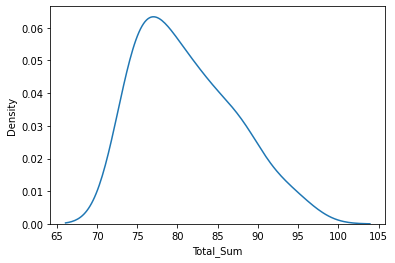

In [ ]:
sns.kdeplot(df_new1["Total_Sum"])

In [ ]:
df_new2 = df_final[df_final['QOL Status']=='Neither Poor nor Good']
df_new2

,Q3,Q4,Q10,Q15,Q16,Q17,Q18,D1_Sum,D1_Score,Q5,...,Q23,Q24,Q25,D4_Sum,D4_Score,Total_Sum,Total_Mean,TotalQ_Mean,TotalScore_Mean,QOL Status
2,3.0,3.0,2.0,2.0,1.0,2.0,2.0,15.0,28.571429,2.0,...,4.0,4.0,4.0,29.0,65.625,61.0,15.25,2.541667,31.882440,Neither Poor nor Good
3,4.0,3.0,3.0,1.0,1.0,3.0,2.0,17.0,35.714286,1.0,...,4.0,5.0,5.0,32.0,75.000,72.0,18.00,3.000000,48.511905,Neither Poor nor Good
4,3.0,3.0,2.0,4.0,2.0,4.0,3.0,21.0,50.000000,2.0,...,4.0,4.0,4.0,26.0,56.250,66.0,16.50,2.750000,40.104167,Neither Poor nor Good
8,2.0,2.0,3.0,4.0,1.0,3.0,2.0,17.0,35.714286,2.0,...,1.0,4.0,5.0,23.0,46.875,66.0,16.50,2.750000,43.563988,Neither Poor nor Good
12,3.0,3.0,2.0,3.0,1.0,2.0,2.0,16.0,32.142857,1.0,...,4.0,4.0,5.0,30.0,68.750,64.0,16.00,2.666667,39.806548,Neither Poor nor Good
14,3.0,3.0,2.0,2.0,1.0,2.0,2.0,15.0,28.571429,3.0,...,4.0,4.0,5.0,32.0,75.000,72.0,18.00,3.000000,48.809524,Neither Poor nor Good
17,3.0,3.0,2.0,5.0,1.0,2.0,2.0,18.0,39.285714,1.0,...,5.0,4.0,5.0,30.0,68.750,67.0,16.75,2.791667,43.675595,Neither Poor nor Good
18,1.0,1.0,4.0,5.0,2.0,4.0,3.0,20.0,46.428571,2.0,...,3.0,4.0,5.0,28.0,62.500,69.0,17.25,2.875000,41.815476,Neither Poor nor Good
19,1.0,1.0,3.0,5.0,2.0,4.0,4.0,20.0,46.428571,3.0,...,4.0,4.0,5.0,30.0,68.750,72.0,18.00,3.000000,42.336310,Neither Poor nor Good
22,3.0,3.0,3.0,5.0,4.0,2.0,2.0,22.0,53.571429,1.0,...,4.0,5.0,5.0,31.0,71.875,68.0,17.00,2.833333,40.736607,Neither Poor nor Good


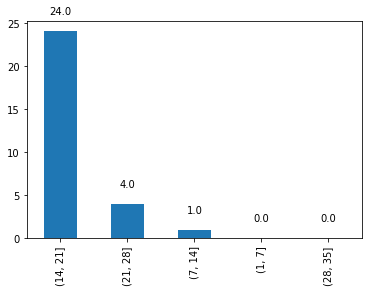

In [ ]:
ax = pd.cut(df_new2['D1_Sum'],[1, 7, 14, 21, 28, 35]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

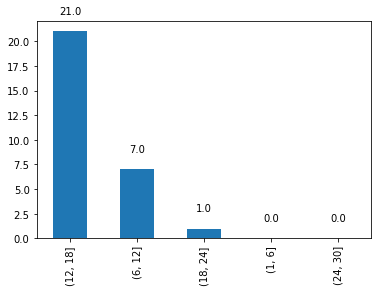

In [ ]:
ax = pd.cut(df_new2['D2_Sum'],[1, 6, 12, 18, 24, 30]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

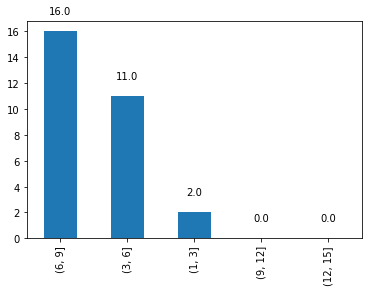

In [ ]:
ax = pd.cut(df_new2['D3_Sum'],[1, 3, 6, 9, 12, 15]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

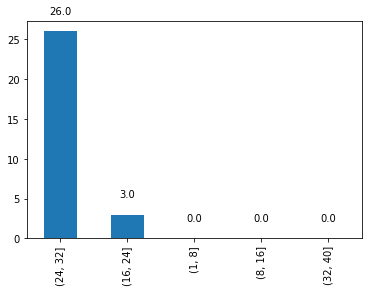

In [ ]:
ax = pd.cut(df_new2['D4_Sum'],[1, 8, 16, 24, 32, 40]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

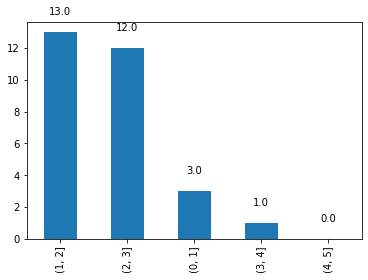

In [ ]:
ax = pd.cut(df_new2['Q3'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

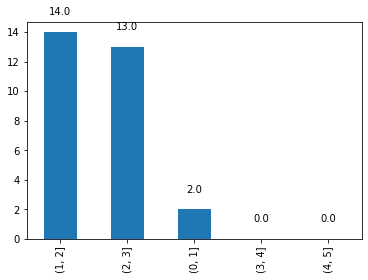

In [ ]:
ax = pd.cut(df_new2['Q4'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

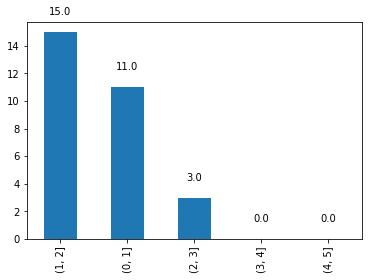

In [ ]:
ax = pd.cut(df_new2['Q5'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

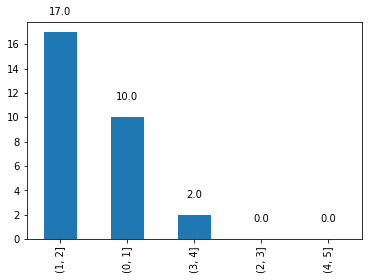

In [ ]:
ax = pd.cut(df_new2['Q6'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

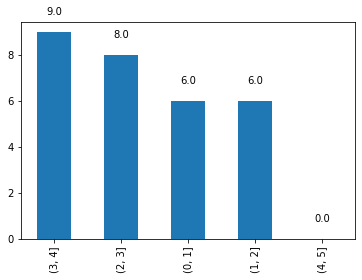

In [ ]:
ax = pd.cut(df_new2['Q7'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

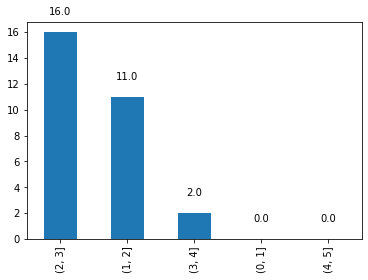

In [ ]:
ax = pd.cut(df_new2['Q8'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

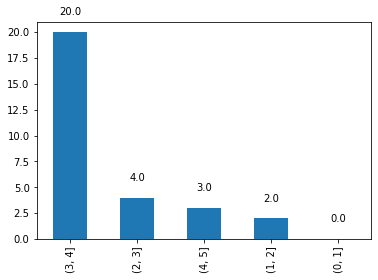

In [ ]:
ax = pd.cut(df_new2['Q9'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

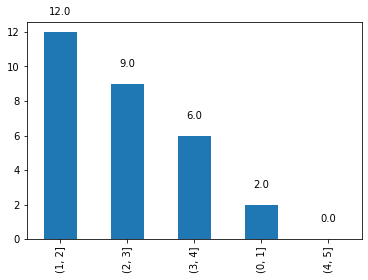

In [ ]:
ax = pd.cut(df_new2['Q10'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

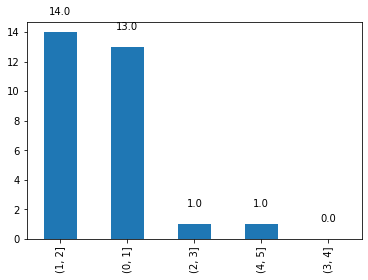

In [ ]:
ax = pd.cut(df_new2['Q11'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

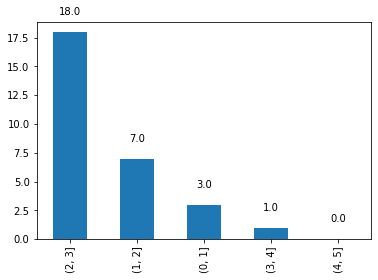

In [ ]:
ax = pd.cut(df_new2['Q12'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

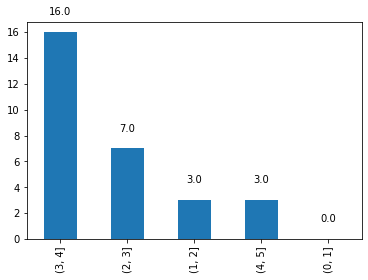

In [ ]:
ax = pd.cut(df_new2['Q13'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

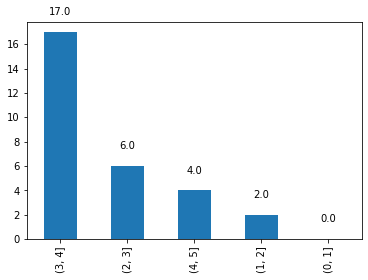

In [ ]:
ax = pd.cut(df_new2['Q14'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

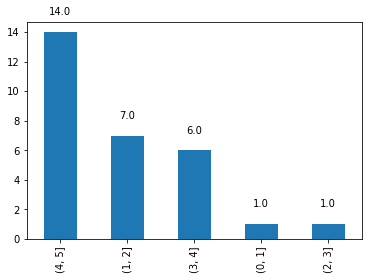

In [ ]:
ax = pd.cut(df_new2['Q15'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

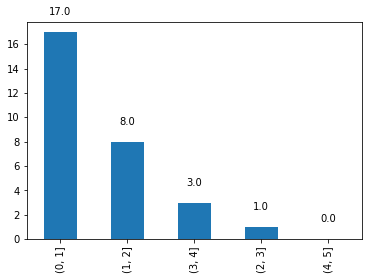

In [ ]:
ax = pd.cut(df_new2['Q16'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

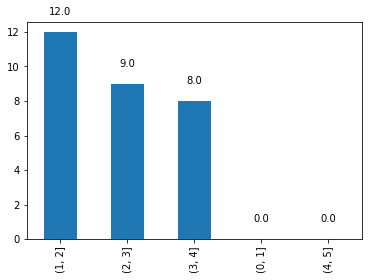

In [ ]:
ax = pd.cut(df_new2['Q17'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

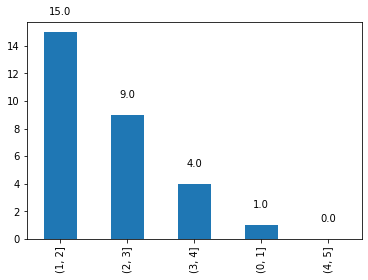

In [ ]:
ax = pd.cut(df_new2['Q18'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

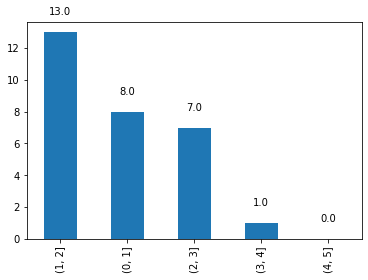

In [ ]:
ax = pd.cut(df_new2['Q19'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

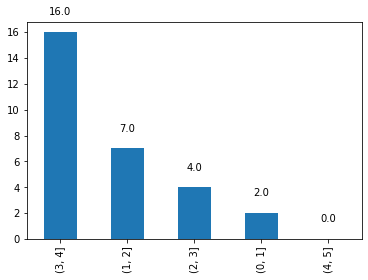

In [ ]:
ax = pd.cut(df_new2['Q20'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

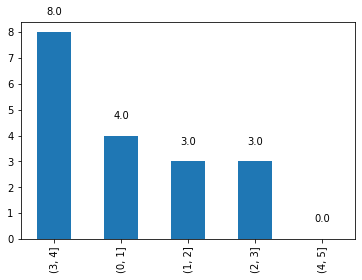

In [ ]:
ax = pd.cut(df_new2['Q21'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

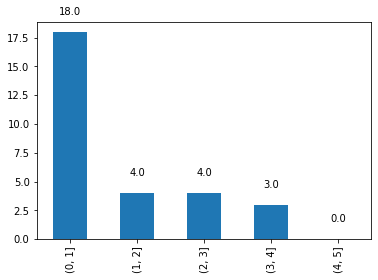

In [ ]:
ax = pd.cut(df_new2['Q22'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

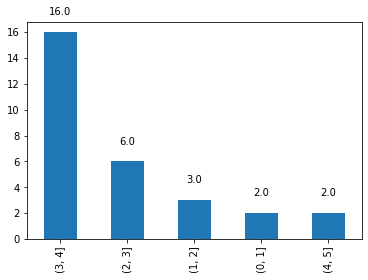

In [ ]:
ax = pd.cut(df_new2['Q23'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

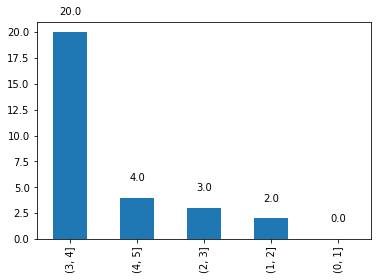

In [ ]:
ax = pd.cut(df_new2['Q24'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

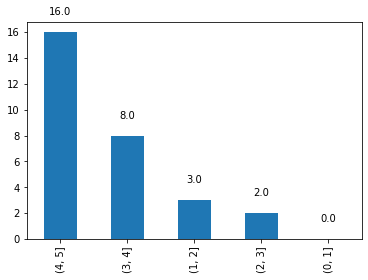

In [ ]:
ax = pd.cut(df_new2['Q25'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

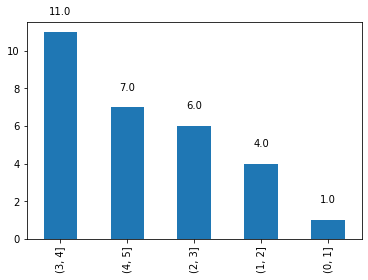

In [ ]:
ax = pd.cut(df_new2['Q26'],[0,1, 2, 3, 4, 5]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

In [ ]:
# plt.figure(figsize = (15,10))
# plt.subplot(1,24,1)


# plt.subplot(1,24,2)

# plt.subplot(1,24,3)

# plt.subplot(1,24,4)


# plt.subplot(1,24,5)  

# plt.subplot(1,24,6)


# plt.subplot(1,24,7)


# plt.subplot(1,24,8)


# plt.subplot(1,24,9)   


# plt.subplot(1,24,10)  

# plt.subplot(1,24,11)

# plt.subplot(1,24,12)   

# plt.subplot(1,24,13)

# plt.subplot(1,24,14)

    
# plt.subplot(1,24,15)

    
# plt.subplot(1,24,16)

    
# plt.subplot(1,24,17)

# plt.subplot(1,24,18)     
# plt.subplot(1,24,19)
# plt.subplot(1,24,20)
# plt.subplot(1,24,21)
# plt.subplot(1,24,22)
# plt.subplot(1,24,23)

In [ ]:
print('Q3 =',df_new2["Q3"].sum())
print('Q4 =',df_new2["Q4"].sum())
print('Q10 =',df_new2["Q10"].sum())
print('Q15 =',df_new2["Q15"].sum())
print('Q16 =',df_new2["Q16"].sum())
print('Q17 =',df_new2["Q17"].sum())
print('Q18 =',df_new2["Q18"].sum())

print('Q5 =',df_new2["Q5"].sum())
print('Q6 =',df_new2["Q6"].sum())
print('Q7 =',df_new2["Q7"].sum())
print('Q11 =',df_new2["Q11"].sum())
print('Q19 =',df_new2["Q19"].sum())
print('Q26 =',df_new2["Q26"].sum())

print('Q20 =',df_new2["Q20"].sum())
print('Q21 =',df_new2["Q21"].sum())
print('Q22 =',df_new2["Q22"].sum())

print('Q8 =',df_new2["Q8"].sum())
print('Q9 =',df_new2["Q9"].sum())
print('Q12 =',df_new2["Q12"].sum())
print('Q13 =',df_new2["Q13"].sum())
print('Q14 =',df_new2["Q14"].sum())
print('Q23 =',df_new2["Q23"].sum())
print('Q24 =',df_new2["Q24"].sum())
print('Q25 =',df_new2["Q25"].sum())

Q3 = 69.0
Q4 = 69.0
Q10 = 77.0
Q15 = 112.0
Q16 = 48.0
Q17 = 83.0
Q18 = 74.0
Q5 = 50.0
Q6 = 52.0
Q7 = 78.0
Q11 = 49.0
Q19 = 59.0
Q26 = 106.0
Q20 = 92.0
Q21 = 51.0
Q22 = 50.0
Q8 = 78.0
Q9 = 111.0
Q12 = 75.0
Q13 = 106.0
Q14 = 110.0
Q23 = 100.0
Q24 = 113.0
Q25 = 124.0


Question 16 got lowest score How satisfied are you with your sleep?
Question 


In [ ]:
print('D1 Sum =',df_new2["D1_Sum"].sum())
print('D2 Sum =',df_new2["D2_Sum"].sum())
print('D3 Sum =',df_new2["D3_Sum"].sum())
print('D4 Sum =',df_new2["D4_Sum"].sum())

D1 Sum = 532.0
D2 Sum = 394.0
D3 Sum = 193.0
D4 Sum = 817.0


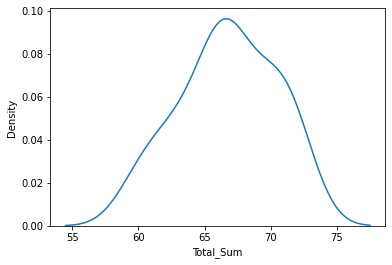

In [ ]:
sns.kdeplot(df_new2["Total_Sum"])

In [ ]:
df_new = df_new1[['D1_Sum', 'D2_Sum', 'D3_Sum','D4_Sum']].copy()

In [ ]:
df_new.head()

,D1_Sum,D2_Sum,D3_Sum,D4_Sum
0,26.0,23.0,6.0,35.0
1,22.0,19.0,6.0,32.0
5,22.0,15.0,10.0,33.0
6,24.0,20.0,12.0,33.0
7,26.0,18.0,11.0,33.0


In [ ]:
for ind,row in df_new.iterrows():
    df_new.loc[ind,"D1_Mean"] = row["D1_Sum"]/7
for ind,row in df_new.iterrows():
    df_new.loc[ind,"D2_Mean"] = row["D2_Sum"]/6
for ind,row in df_new.iterrows():
    df_new.loc[ind,"D3_Mean"] = row["D3_Sum"]/3
for ind,row in df_new.iterrows():
    df_new.loc[ind,"D4_Mean"] = row["D4_Sum"]/8

In [ ]:
add_new_col(df_new,"D1Label","D1_Mean")

In [ ]:
add_new_col(df_new,"D2Label","D2_Mean")

In [ ]:
add_new_col(df_new,"D3Label","D3_Mean")

In [ ]:
add_new_col(df_new,"D4Label","D4_Mean")

In [ ]:
# for ind,row in df_new.iterrows():
#   if(row["D1_Mean"]<=1):
#     df_new.loc[ind,"D1Label"] = "Very Dissatisfied"
#   elif(row["D1_Mean"]<=2):
#     df_new.loc[ind,"D1Label"] = "Dissatisfied"
#   elif(row["D1_Mean"]<=3):
#     df_new.loc[ind,"D1Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D1_Mean"]<=4):
#     df_new.loc[ind,"D1Label"] = "Satisfied"
#   elif(row["D1_Mean"]<=5):
#     df_new.loc[ind,"D1Label"] = "Very Satisfied"

In [ ]:
# for ind,row in df_new.iterrows():
#   if(row["D2_Mean"]<=1):
#     df_new.loc[ind,"D2Label"] = "Very Dissatisfied"
#   elif(row["D2_Mean"]<=2):
#     df_new.loc[ind,"D2Label"] = "Dissatisfied"
#   elif(row["D2_Mean"]<=3):
#     df_new.loc[ind,"D2Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D2_Mean"]<=4):
#     df_new.loc[ind,"D2Label"] = "Satisfied"
#   elif(row["D2_Mean"]<=5):
#     df_new.loc[ind,"D2Label"] = "Very Satisfied"

In [ ]:
# for ind,row in df_new.iterrows():
#   if(row["D3_Mean"]<=1):
#     df_new.loc[ind,"D3Label"] = "Very Dissatisfied"
#   elif(row["D3_Mean"]<=2):
#     df_new.loc[ind,"D3Label"] = "Dissatisfied"
#   elif(row["D3_Mean"]<=3):
#     df_new.loc[ind,"D3Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D3_Mean"]<=4):
#     df_new.loc[ind,"D3Label"] = "Satisfied"
#   elif(row["D3_Mean"]<=5):
#     df_new.loc[ind,"D3Label"] = "Very Satisfied"

In [ ]:
# for ind,row in df_new.iterrows():
#   if(row["D4_Mean"]<=1):
#     df_new.loc[ind,"D4Label"] = "Very Dissatisfied"
#   elif(row["D4_Mean"]<=2):
#     df_new.loc[ind,"D4Label"] = "Dissatisfied"
#   elif(row["D4_Mean"]<=3):
#     df_new.loc[ind,"D4Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D4_Mean"]<=4):
#     df_new.loc[ind,"D4Label"] = "Satisfied"
#   elif(row["D4_Mean"]<=5):
#     df_new.loc[ind,"D4Label"] = "Very Satisfied"

In [ ]:
df_new.head()

,D1_Sum,D2_Sum,D3_Sum,D4_Sum,D1_Mean,D2_Mean,D3_Mean,D4_Mean,D1Label,D2Label,D3Label,D4Label
0,26.0,23.0,6.0,35.0,3.714286,3.833333,2.000000,4.375,Good,Good,Poor,Very Good
1,22.0,19.0,6.0,32.0,3.142857,3.166667,2.000000,4.000,Good,Good,Poor,Good
5,22.0,15.0,10.0,33.0,3.142857,2.500000,3.333333,4.125,Good,Neither Poor nor Good,Good,Very Good
6,24.0,20.0,12.0,33.0,3.428571,3.333333,4.000000,4.125,Good,Good,Good,Very Good
7,26.0,18.0,11.0,33.0,3.714286,3.000000,3.666667,4.125,Good,Neither Poor nor Good,Good,Very Good


In [ ]:
print(df_new['D1Label'].value_counts())

Good                     32
Neither Poor nor Good    25
Name: D1Label, dtype: int64


In [ ]:
print(df_new['D2Label'].value_counts())

Good                     27
Neither Poor nor Good    26
Poor                      2
Very Good                 2
Name: D2Label, dtype: int64


In [ ]:
print(df_new['D3Label'].value_counts())

Neither Poor nor Good    28
Good                     21
Poor                      8
Name: D3Label, dtype: int64


In [ ]:
print(df_new['D4Label'].value_counts())

Good         32
Very Good    25
Name: D4Label, dtype: int64


In [ ]:
dfnew = df_new2[['D1_Sum', 'D2_Sum', 'D3_Sum','D4_Sum']].copy()

In [ ]:
dfnew.head()

,D1_Sum,D2_Sum,D3_Sum,D4_Sum
2,15.0,14.0,3.0,29.0
3,17.0,14.0,9.0,32.0
4,21.0,13.0,6.0,26.0
8,17.0,18.0,8.0,23.0
12,16.0,10.0,8.0,30.0


In [ ]:
for ind,row in dfnew.iterrows():
    dfnew.loc[ind,"D1_Mean"] = row["D1_Sum"]/7
for ind,row in dfnew.iterrows():
    dfnew.loc[ind,"D2_Mean"] = row["D2_Sum"]/6
for ind,row in dfnew.iterrows():
    dfnew.loc[ind,"D3_Mean"] = row["D3_Sum"]/3
for ind,row in dfnew.iterrows():
    dfnew.loc[ind,"D4_Mean"] = row["D4_Sum"]/8

In [ ]:
add_new_col(dfnew,"D1Label","D1_Mean")

In [ ]:
add_new_col(dfnew,"D2Label","D2_Mean")

In [ ]:
add_new_col(dfnew,"D3Label","D3_Mean")

In [ ]:
add_new_col(dfnew,"D4Label","D4_Mean")

In [ ]:
# for ind,row in dfnew.iterrows():
#   if(row["D1_Mean"]<=1):
#     dfnew.loc[ind,"D1Label"] = "Very Dissatisfied"
#   elif(row["D1_Mean"]<=2):
#     dfnew.loc[ind,"D1Label"] = "Dissatisfied"
#   elif(row["D1_Mean"]<=3):
#     dfnew.loc[ind,"D1Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D1_Mean"]<=4):
#     dfnew.loc[ind,"D1Label"] = "Satisfied"
#   elif(row["D1_Mean"]<=5):
#     dfnew.loc[ind,"D1Label"] = "Very Satisfied"

In [ ]:
# for ind,row in dfnew.iterrows():
#   if(row["D2_Mean"]<=1):
#     dfnew.loc[ind,"D2Label"] = "Very Dissatisfied"
#   elif(row["D2_Mean"]<=2):
#     dfnew.loc[ind,"D2Label"] = "Dissatisfied"
#   elif(row["D2_Mean"]<=3):
#     dfnew.loc[ind,"D2Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D2_Mean"]<=4):
#     dfnew.loc[ind,"D2Label"] = "Satisfied"
#   elif(row["D2_Mean"]<=5):
#     dfnew.loc[ind,"D2Label"] = "Very Satisfied"

In [ ]:
# for ind,row in dfnew.iterrows():
#   if(row["D3_Mean"]<=1):
#     dfnew.loc[ind,"D3Label"] = "Very Dissatisfied"
#   elif(row["D3_Mean"]<=2):
#     dfnew.loc[ind,"D3Label"] = "Dissatisfied"
#   elif(row["D3_Mean"]<=3):
#     dfnew.loc[ind,"D3Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D3_Mean"]<=4):
#     dfnew.loc[ind,"D3Label"] = "Satisfied"
#   elif(row["D3_Mean"]<=5):
#     dfnew.loc[ind,"D3Label"] = "Very Satisfied"

In [ ]:
# for ind,row in dfnew.iterrows():
#   if(row["D4_Mean"]<=1):
#     dfnew.loc[ind,"D4Label"] = "Very Dissatisfied"
#   elif(row["D4_Mean"]<=2):
#     dfnew.loc[ind,"D4Label"] = "Dissatisfied"
#   elif(row["D4_Mean"]<=3):
#     dfnew.loc[ind,"D4Label"] = "Neither Dissatisfied nor Satisfied"
#   elif(row["D4_Mean"]<=4):
#     dfnew.loc[ind,"D4Label"] = "Satisfied"
#   elif(row["D4_Mean"]<=5):
#     dfnew.loc[ind,"D4Label"] = "Very Satisfied"

In [ ]:
print(dfnew['D1Label'].value_counts())

Neither Poor nor Good    24
Good                      4
Poor                      1
Name: D1Label, dtype: int64


In [ ]:
print(dfnew['D2Label'].value_counts())

Neither Poor nor Good    21
Poor                      7
Good                      1
Name: D2Label, dtype: int64


In [ ]:
print(dfnew['D3Label'].value_counts())

Neither Poor nor Good    16
Poor                     11
Very Poor                 2
Name: D3Label, dtype: int64


In [ ]:
print(dfnew['D4Label'].value_counts())

Good                     26
Neither Poor nor Good     3
Name: D4Label, dtype: int64


Domain 1


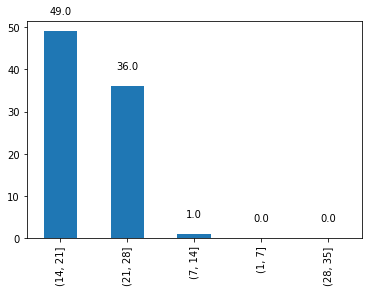

In [ ]:
print("Domain 1")
ax = pd.cut(df_final['D1_Sum'],[1, 7, 14, 21, 28, 35]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

This is the graph of domain1: Physical health domain 
 
From above graph we can see that 36 patients has total score ranges in (21,28] from this we can infer that 49 patients' physical health is somewhat better (satisfied) , 49 patients has total score ranges in (14,21] from this we can infer that 36 patients' physical health is neither good nor bad (neither satisfied nor dissatisfied) and 1 patients has total score ranges in (7,14] from this we can infer that those patients are dissatisfied with their physical health.

Domain 2


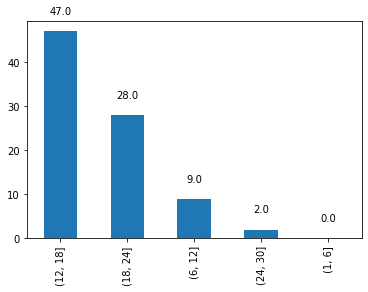

In [ ]:
print("Domain 2")
ax = pd.cut(df_final['D2_Sum'],[1, 6, 12, 18, 24, 30]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

This is graph from Domain2: Psychological health 
 
From above graph we can see that 47 patients has total score ranges in (12,18] from this we can infer that 47 patients' psychological health is neither good nor bad (neither satisfied nor dissatisfied) , 28 patients has total score ranges in (18,24] from this we can infer that 28 patients' psychological health is good (satisfied) and 9 patients has total score ranges in (6,12] from this we can infer that 9 patients' psychological health is not good (dissatisfied) , 2 patients score ranges in (24,30] by this it is clear that their psychological health is good (satisfied).

Domain 3


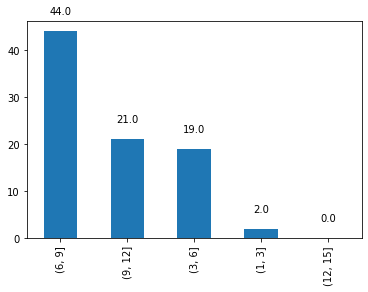

In [ ]:
print("Domain 3")
ax = pd.cut(df_final['D3_Sum'],[1, 3, 6, 9, 12, 15]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

This is the graph from Domain 3 : Social relationships 

From above graph we can see that 44 patients has total score ranges in (6,9] from this we can infer that 44 patients' Social relationships neither satisfied nor dissatisfied , 21 patients has total score ranges in (9,12] from this we can infer that 21 patients' Social relationships are good (satisfied) , 19 patients have their scores in the range of (3,6] this infers that their Social relationships are bad (dissatisfied), 2 patient has his total score ranges in (1,3] from this we can say that his Social relationships are very bad(very dissatisfied).

Domain 4


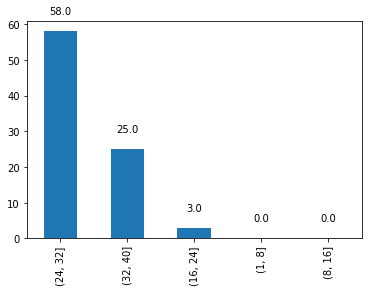

In [ ]:
print("Domain 4")
ax = pd.cut(df_final['D4_Sum'],[1, 8, 16, 24, 32, 40]).value_counts().plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

This is graph from Domain 4: Environment status 
 
From the above graph we can see that 58 patients has total score ranges in(24,32] from this we can infer that 58 patients have a satisfied environmental status. 
25 patients has score range in(32,40] this says that 25 patients have very satisfied environmental status, and 3 patients have scores in range (16,24] this infers that 3 patients have neither satisfied nor dissatisfied enironmental status.

In [ ]:
# series of counts
# Q4_1 = df1["Q4"].value_counts()
# Q16_1 = df1["Q16"].value_counts()
# # print the counts
# print(Q4_1)
# print(Q16_1)

Range [1-35]


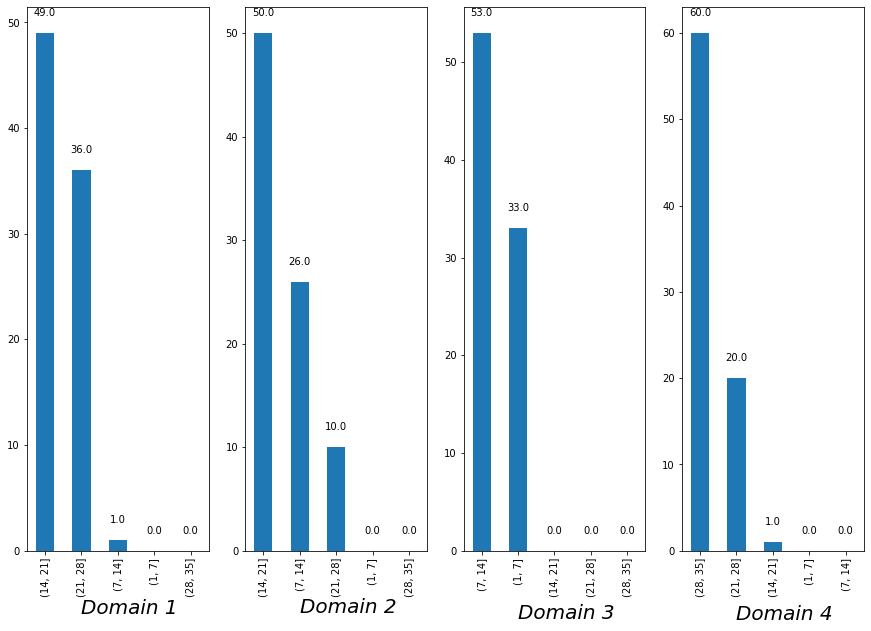

In [ ]:
print("Range [1-35]")
################################## Domain 1 ##################################
plt.figure(figsize = (15,10))
plt.subplot(1,4,1)
ax = pd.cut(df_final['D1_Sum'],[1, 7, 14, 21, 28, 35]).value_counts().plot.bar()
ax.text(1,-6,'Domain 1',style = 'italic',fontsize = 20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')
    
################################## Domain 2 ##################################
    
plt.subplot(1,4,2)
ax = pd.cut(df_final['D2_Sum'],[1, 7, 14, 21, 28, 35]).value_counts().plot.bar()
ax.text(1,-6,'Domain 2',style = 'italic',fontsize = 20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,20), 
                   textcoords = 'offset points')
    
################################## Domain 3 ##################################

plt.subplot(1,4,3)
ax = pd.cut(df_final['D3_Sum'],[1, 7, 14, 21, 28, 35]).value_counts().plot.bar()
ax.text(1,-7,'Domain 3',style = 'italic',fontsize = 20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')
    
################################## Domain 4 ##################################

plt.subplot(1,4,4)
ax = pd.cut(df_final['D4_Sum'],[1, 7, 14, 21, 28, 35]).value_counts().plot.bar()
ax.text(1,-8,'Domain 4',style = 'italic',fontsize = 20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), 
                   textcoords = 'offset points')

For the above graph the range taken is  [1,35] 

we can say that many of them(49) are leading a neither dissatisfied nor satisfied physical life.

Higest number of people (50) are leading a neither dissatisfied nor satisfied psychological health.

Higest number of people (53) are having dissatisfied Social relationships.

higest number of people (60) are having a very satisfied Environment status.

In [ ]:
# print("Range [1-30]")
# ################################## Domain 1 ##################################
# plt.figure(figsize = (15,10))
# plt.subplot(1,4,1)
# ax = pd.cut(df_final['D1_Sum'],[1, 6, 12, 18, 24, 30]).value_counts().plot.bar()
# ax.text(1,-8,'Domain 1',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

# ################################## Domain 2 ##################################    

# plt.subplot(1,4,2)
# ax = pd.cut(df_final['D2_Sum'],[1, 6, 12, 18, 24, 30]).value_counts().plot.bar()
# ax.text(1,-8,'Domain 2',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0,20), 
#                    textcoords = 'offset points')

# ################################## Domain 3 ##################################

# plt.subplot(1,4,3)
# ax = pd.cut(df_final['D3_Sum'],[1, 6, 12, 18, 24, 30]).value_counts().plot.bar()
# ax.text(1,-8,'Domain 3',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')
    
# ################################## Domain 4 ##################################

# plt.subplot(1,4,4)
# ax = pd.cut(df_final['D4_Sum'],[1, 6, 12, 18, 24, 30]).value_counts().plot.bar()
# ax.text(1,-6,'Domain 4',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

In [ ]:
# print("Range [1 - 15]")
# ################################## Domain 1 ##################################
# plt.figure(figsize = (15,10))
# plt.subplot(1,4,1)
# ax = pd.cut(df_final['D1_Sum'],[1, 3, 6, 9, 12, 15]).value_counts().plot.bar()
# ax.text(1,-0.5,'Domain 1',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

# ################################## Domain 2 ##################################

# plt.subplot(1,4,2)
# ax = pd.cut(df_final['D2_Sum'],[1, 3, 6, 9, 12, 15]).value_counts().plot.bar()
# ax.text(1,-3,'Domain 2',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0,20), 
#                    textcoords = 'offset points')
    
# ################################## Domain 3 ##################################

# plt.subplot(1,4,3)
# ax = pd.cut(df_final['D3_Sum'],[1, 3, 6, 9, 12, 15]).value_counts().plot.bar()
# ax.text(1,-5,'Domain 3',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')
    
# ################################## Domain 4 ##################################

# plt.subplot(1,4,4)
# ax = pd.cut(df_final['D4_Sum'],[1, 3, 6, 9, 12, 15]).value_counts().plot.bar()
# ax.text(1,-0.07,'Domain 4',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

In [ ]:
# print("Range [1 - 40]")
# ################################## Domain 1 ##################################
# plt.figure(figsize = (15,10))
# plt.subplot(1,4,1)
# ax = pd.cut(df_final['D1_Sum'],[1, 8, 16, 24, 32, 40]).value_counts().plot.bar()
# ax.text(1,-9,'Domain 1',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

# ################################## Domain 2 ##################################    
# plt.subplot(1,4,2)
# ax = pd.cut(df_final['D2_Sum'],[1, 8, 16, 24, 32, 40]).value_counts().plot.bar()
# ax.text(1,-6,'Domain 2',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0,20), 
#                    textcoords = 'offset points')

# ################################## Domain 3 ###################################

# plt.subplot(1,4,3)
# ax = pd.cut(df_final['D3_Sum'],[1, 8, 16, 24, 32, 40]).value_counts().plot.bar()
# ax.text(1,-6,'Domain 3',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

# ################################## Domain 4 ##################################

# plt.subplot(1,4,4)
# ax = pd.cut(df_final['D4_Sum'],[1, 8, 16, 24, 32, 40]).value_counts().plot.bar()
# ax.text(1,-8,'Domain 4',style = 'italic',fontsize = 20)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 20), 
#                    textcoords = 'offset points')

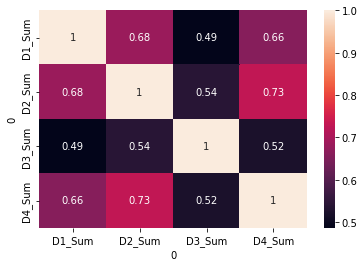

In [ ]:
data1 = df_final.groupby(by=["Total_Mean"])[['D1_Sum', 'D2_Sum', 'D3_Sum', 'D4_Sum']].mean()
sns.heatmap(data1.corr(),annot=True)

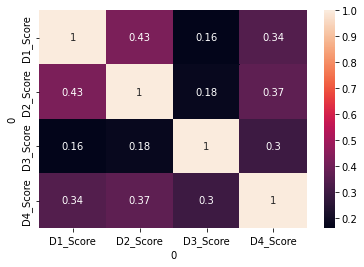

In [ ]:
data1 = df_final.groupby(by=["TotalScore_Mean"])[['D1_Score', 'D2_Score', 'D3_Score', 'D4_Score']].mean()
sns.heatmap(data1.corr(),annot=True)

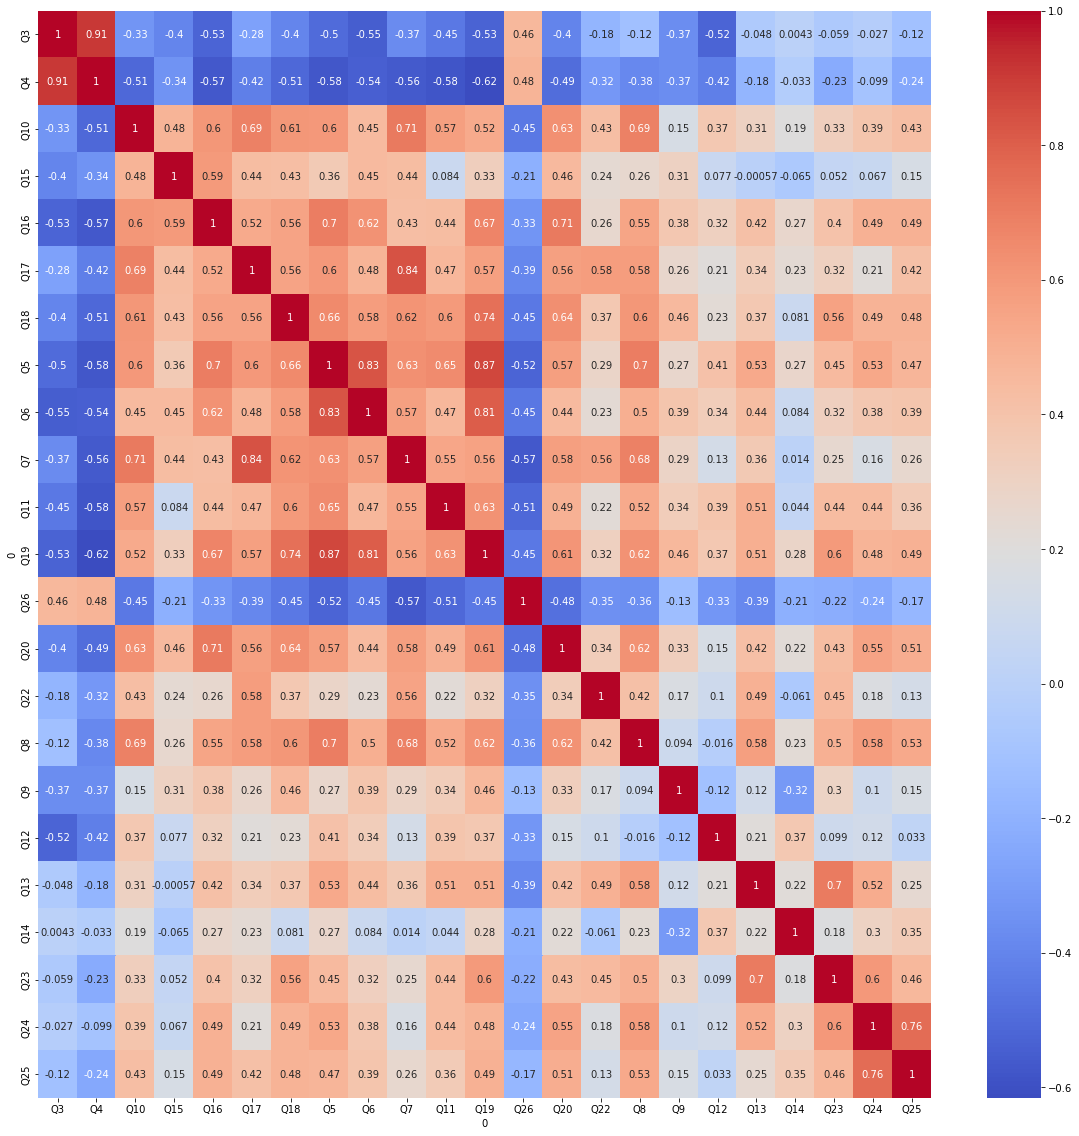

In [ ]:
plt.figure(figsize = (20,20))
data1 = df_final.groupby(by=["Total_Sum"])[['Q3', 'Q4', 'Q10', 'Q15', 'Q16', 'Q17', 'Q18','Q5', 'Q6', 'Q7', 'Q11', 'Q19', 'Q26','Q20', 'Q22','Q8', 'Q9', 'Q12', 'Q13', 'Q14', 'Q23','Q24','Q25']].mean()
sns.heatmap(data1.corr(),cmap="coolwarm",annot=True)

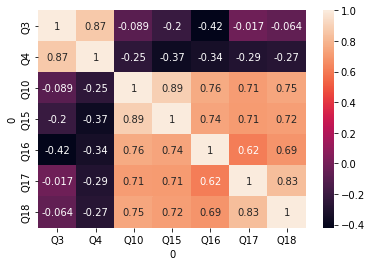

In [ ]:
data1 = df_final.groupby(by=["D1_Sum"])[['Q3', 'Q4', 'Q10', 'Q15', 'Q16', 'Q17', 'Q18']].mean()
sns.heatmap(data1.corr(),annot=True)

As we can see in graph that the Q3(To what extent do 
you feel that 
physical pain 
prevents you from 
doing what you 
need to do?) and Q4(How much do you 
need any medical 
treatment to 
function in your 
daily life?) are highly correlated these two qusetions contributing more to quality of life of person.

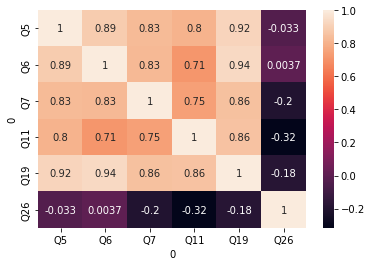

In [ ]:
data2 = df_final.groupby(by=["D2_Sum"])[['Q5', 'Q6', 'Q7', 'Q11', 'Q19', 'Q26']].mean()
sns.heatmap(data2.corr(),annot=True)

In this Domain2 Q6 (How satisfied are 
you with yourself?) and Q16
( To what extent do 
you feel your life to 
be meaningful?) are highly correlated. This shows that the way how alcoholics lead their lives is not acceptable by them itself.

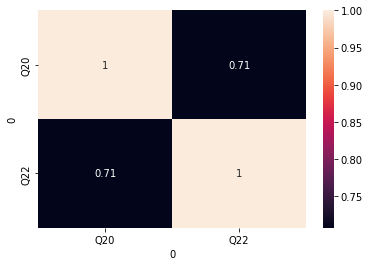

In [ ]:
data3 = df_final.groupby(by=["D3_Sum"])[['Q20', 'Q22']].mean()
sns.heatmap(data3.corr(),annot=True)

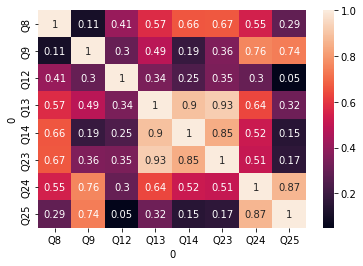

In [ ]:
data4 = df_final.groupby(by=["D4_Sum"])[['Q8', 'Q9', 'Q12', 'Q13', 'Q14', 'Q23','Q24','Q25']].mean()
sns.heatmap(data4.corr(),annot=True)

This heat map shows high correlation between Q13 ( How available to you is the 
information that 
you need in your 
day-to-day life?) and Q23 (How satisfied are 
you with the 
conditions of your 
living place?). These two questions tells about neighbours or surrondings of alcoholics which is where they need to get support from the neighbours in their day-today-life life. 

In [ ]:
# ##mean standard deviation 
# import statistics
# from statistics import stdev


# for ind,row in df1.iterrows():
#     df1.loc[ind,"mean"] = row["Sum"]/7
# for ind,row in df2.iterrows():
#     df2.loc[ind,"mean"] = row["Sum"]/6
# for ind,row in df3.iterrows():
#     df3.loc[ind,"mean"] = row["Sum"]/3
# for ind,row in df4.iterrows():
#     df4.loc[ind,"mean"] =  row["Sum"]/8




# for ind,row in df1.iterrows():
#     df1.loc[ind,"SD"] = df1.std(axis=1)
    
# for ind,row in df2.iterrows():
#     df2.loc[ind,"SD"] = df2.std(axis=1)
    
# for ind,row in df3.iterrows():
#     df3.loc[ind,"SD"] = df3.std(axis=1)

# for ind,row in df4.iterrows():
#     df4.loc[ind,"SD"] = df4.std(axis=1)




In [ ]:
####### dataframe1 #########
# # copy the data
# df1_min_max_scaled = df_final.copy()

# # apply normalization techniques
# for column in df1_min_max_scaled.columns:
# 	df1_min_max_scaled['Q3,Q4,Q10,Q15,Q16,Q17,Q18'] = (df1_min_max_scaled['Q3,Q4,Q10,Q15,Q16,Q17,Q18'] - df1_min_max_scaled['Q3,Q4,Q10,Q15,Q16,Q17,Q18'].min()) / (df1_min_max_scaled['Q3,Q4,Q10,Q15,Q16,Q17,Q18'].max() - df1_min_max_scaled['Q3,Q4,Q10,Q15,Q16,Q17,Q18'].min())	

# # view normalized data
# print(df1_min_max_scaled)



In [ ]:
# x = df1.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df1 = pd.DataFrame(x_scaled)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
	
# Plot between -30 and 30 with
# 0.1 steps.
# x_axis = df_final["TotalQ_Mean"]
	
# # Calculating mean and standard
# # deviation
# mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
	
# plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
# plt.show()


In [ ]:
from scipy.stats import norm
import numpy as np

def normal_pdf(x,mu,sigma):
  return (1/(sigma*np.sqrt(2*np.pi))) * np.exp((-1/2) *((x-mu)/sigma)**2)
normal_pdf(np.array([1,2,3]),0,1)

array([0.24197072, 0.05399097, 0.00443185])

In [ ]:
x = np.array([1,2,3])
norm.pdf(x, loc=0, scale=1)

array([0.24197072, 0.05399097, 0.00443185])

In [ ]:
# x = np.linspace(-5,5,5000)
# fig, ax = plt.subplots(figsize=(16,6))
x = df_final["Total_Sum"]
ax.plot(x,normal_pdf(x,0,1))
plt.show()

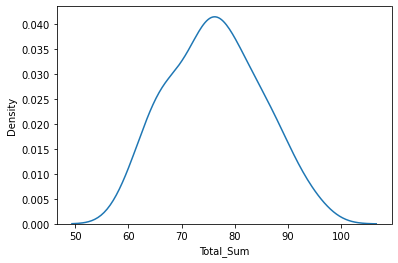

In [ ]:
sns.kdeplot(df_final["Total_Sum"])

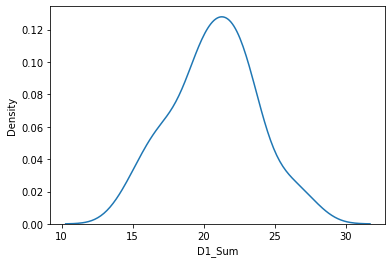

In [ ]:
sns.kdeplot(df_final["D1_Sum"])

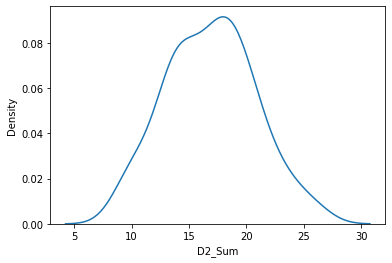

In [ ]:
sns.kdeplot(df_final["D2_Sum"])

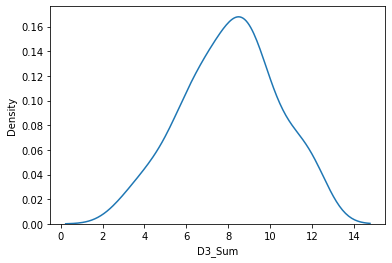

In [ ]:
sns.kdeplot(df_final["D3_Sum"])

In [ ]:
sns.kdeplot(df_final["D4_Sum"])

In [ ]:
for ind,row in df_final.iterrows():
  if(row["QOL Status"] == "Very Poor"):
    df_final.loc[ind,"Encode_Label"] = 0
  elif(row["QOL Status"] == "Poor"):
    df_final.loc[ind,"Encode_Label"] = 1
  elif(row["QOL Status"] == "Neither Poor nor Good"):
    df_final.loc[ind,"Encode_Label"] = 2
  elif(row["QOL Status"] == "Good"):
    df_final.loc[ind,"Encode_Label"] = 3
  elif(row["QOL Status"] == "Very Good"):
    df_final.loc[ind,"Encode_Label"] = 4

In [ ]:
newdf = df_final[['Q3', 'Q4', 'Q10', 'Q15', 'Q16', 'Q17', 'Q18','Q5', 'Q6', 'Q7', 'Q11', 'Q19', 'Q26','Q20', 'Q21','Q22','Q8', 'Q9', 'Q12', 'Q13', 'Q14', 'Q23','Q24','Q25','Encode_Label']].copy()

In [ ]:
newdf

,Q3,Q4,Q10,Q15,Q16,Q17,Q18,Q5,Q6,Q7,...,Q22,Q8,Q9,Q12,Q13,Q14,Q23,Q24,Q25,Encode_Label
0,1.0,1.0,4.0,5.0,4.0,3.0,8.0,4.0,4.0,4.0,...,1.0,4.0,5.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0
1,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0
2,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0
3,4.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,4.0,...,1.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,2.0
4,3.0,3.0,2.0,4.0,2.0,4.0,3.0,2.0,1.0,3.0,...,2.0,3.0,4.0,1.0,4.0,2.0,4.0,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2.0,2.0,4.0,5.0,1.0,4.0,4.0,2.0,4.0,4.0,...,3.0,3.0,4.0,3.0,4.0,4.0,5.0,2.0,3.0,3.0
82,1.0,1.0,3.0,5.0,4.0,4.0,3.0,4.0,3.0,4.0,...,1.0,3.0,4.0,3.0,2.0,5.0,3.0,2.0,4.0,3.0
83,2.0,2.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,3.0,...,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,4.0,2.0
84,2.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,4.0,...,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0


In [ ]:
x= newdf.iloc[:, :-1].values  
y= newdf.iloc[:, 24:].values  

In [ ]:
x.shape

(86, 24)

In [ ]:
y.shape

(86, 1)

In [ ]:
# df_final[df_final["Q26"].isnull()]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# print(y)

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  

In [ ]:
from sklearn.linear_model import LinearRegression  
mlr= LinearRegression()  
mlr.fit(x_train, y_train)  

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  [-0.26977589]
Coefficients:


[(array([1.0, 1.0, 4.0, 5.0, 4.0, 3.0, 8.0, 4.0, 4.0, 4.0, 4.0, 5.0, 2.0,
         5.0, 0.0, 1.0, 4.0, 5.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0],
        dtype=object),
  array([-0.15183508,  0.26757654, -0.02605479,  0.07109088,  0.08206314,
         -0.15831964,  0.06319699, -0.01297796,  0.01025461,  0.26054451,
          0.00465713,  0.15087389,  0.05634186, -0.12859441,  0.06330191,
          0.01235104,  0.10234401,  0.0757106 , -0.03632387,  0.14570355,
          0.09843248,  0.06352268, -0.11743602,  0.01016205]))]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [[2.05436393]
 [1.78247611]
 [2.17103287]
 [2.88478288]
 [2.26601504]
 [2.16119058]
 [2.93378229]
 [2.13951362]
 [2.52280792]
 [2.85396137]
 [3.1414391 ]
 [2.80656333]
 [2.013076  ]
 [1.86328243]
 [2.01078475]
 [2.92141877]
 [2.05684028]
 [2.83973735]
 [2.5955179 ]
 [2.48476019]
 [1.92423233]
 [3.21436487]
 [2.51876106]
 [3.07021078]
 [2.97880434]
 [2.43558415]
 [2.27029394]
 [2.46859128]
 [2.23853903]]


In [ ]:
y_ls = []
for i in y_pred_mlr:
  if(i <= 0):
    y_ls.append("Very Poor")
  elif(i <= 1):
    y_ls.append("Poor")
  elif(i <= 2):
    y_ls.append("Neither Poor nor Good")
  elif(i <= 3):
    y_ls.append("Good")
  elif(i <= 4):
    y_ls.append("Very Good")

In [ ]:
y_df = pd.DataFrame(y_ls)
print(y_df[0].value_counts())

Good                     23
Neither Poor nor Good     3
Very Good                 3
Name: 0, dtype: int64


In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 54.56
Mean Absolute Error: 0.3179607904878936
Mean Square Error: 0.20549418339236533
Root Mean Square Error: 0.4533146626708266


In [ ]:
# def encode_df(dataframe):
#     le = LabelEncoder()
#     for column in dataframe.columns:
#         dataframe[column] = le.fit_transform(dataframe[column])
#     return dataframe

# #encode the dataframe
# encode_df(df_final)

In [ ]:
# from sklearn import metrics 
# meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr) 
# meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr) 
# rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)) 
# print('Accuracy: {:.2f}'.format(mlr.score(x,y)*100)) 
# print('Mean Absolute Error:', meanAbErr) 
# print('Mean Square Error:', meanSqErr) 
# print('Root Mean Square Error:', rootMeanSqErr)

In [ ]:
print(df_final['QOL Status'].value_counts())

Good                     57
Neither Poor nor Good    29
Name: QOL Status, dtype: int64


In [ ]:
# ####Decision tree 
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# rf = RandomForestClassifier()
# dt.fit(x_train,y_train)
# rf.fit(x_train,y_train)
# print("Training Accuracy of Decision Tree: ", dt.score(x_train,y_train))
# print("Training Accuracy of  Random Forest: ",rf.score(x_train,y_train))
# y_dt = dt.predict(x_test)

# y_rf = rf.predict(x_test)

# print("Testing Accuracy of Decision Tree : ", accuracy_score(y_dt,y_test))

# print("Testing Accuracy Random Forest: ",accuracy_score(y_rf,y_test))


